# Практика

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import math
import statsmodels.stats.api as s
%matplotlib inline
import plotly.graph_objects as go

## ЦПТ для различных распределений
Возьмите то непрерывное распределение, которое вам больше всего понравится из списка доступных в модуле [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html).

### Сгенерируйте примеры из распределения

In [2]:
maxwell_rv = sts.maxwell()
sample = maxwell_rv.rvs(100)
sample

array([0.78831121, 1.92096303, 2.02764159, 1.93081097, 2.23490089,
       2.36907914, 2.3023516 , 1.42385614, 1.79441212, 1.23070643,
       1.14555565, 1.67537086, 2.96928876, 2.48884847, 2.52285951,
       1.79159237, 1.85097448, 1.72136604, 1.50596754, 0.21556485,
       1.82251125, 0.42031296, 1.59278288, 1.736673  , 1.60256493,
       0.87982661, 4.44489179, 1.27950276, 2.10082322, 1.82928474,
       1.56807145, 0.38066267, 0.97319222, 1.67652316, 0.71963611,
       2.73577184, 2.46383504, 1.00711266, 1.64436404, 2.01554037,
       1.61850486, 1.17347706, 0.58619223, 4.24553931, 0.65136896,
       3.10497638, 1.39426616, 2.06608855, 1.7156106 , 0.42547879,
       1.84205943, 3.24066263, 1.23438555, 3.08982174, 2.03639922,
       1.51725435, 1.6210817 , 1.5002265 , 1.88323987, 2.51649962,
       1.1168487 , 1.81877802, 4.61397339, 3.1018573 , 2.00951057,
       1.35019134, 2.43071968, 1.0180221 , 2.35286731, 2.22890392,
       0.66990649, 2.42459787, 2.42357195, 2.11440886, 1.70373

In [18]:
real_mean = maxwell_rv.mean() # настоящее среднее случайной величины
real_var = maxwell_rv.var() # настоящая дисперсия случайной величины

sample_mean = sample.mean() # выборочное среднее
print(sample_mean)
sample_var = sample.var() # выборочная дисперсия
print(sample_var)

1.7961853907471164
0.6393760963931325


### Постройте гистограмму выборки и теоретическую плотность распределения

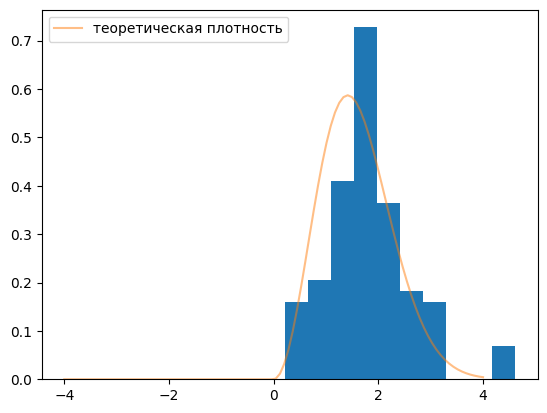

In [12]:
plt.hist(sample, density=True)
x = np.linspace(-4,4,100)
pdf = maxwell_rv.pdf(x)
plt.plot(x, pdf, label='теоретическая плотность', alpha=0.5)
plt.legend()

### Оценим распределение выборочного среднего для разных объёмов выборок
Для этого постройте на одном полотне гистограмму выборочных средних и теоретическое распределение выборочных средних по ЦПТ для разных объёмов выборок.

Для теоретического распределение используйте настоящие значения мат ожидания и дисперсии (не приближенные на основе выборки).

In [17]:
fig = go.Figure()

for N in [10, 100, 1000]:
    means = []
    for i in range(10000):
        means.append(np.mean(maxwell_rv.rvs(N)))
    fig.add_trace(go.Histogram(x=means, histnorm='probability density', name=f'N={N}'))

    norm_rv = sts.norm(loc=maxwell_rv.mean(), scale=maxwell_rv.std() / np.sqrt(N))
    x = np.linspace(0.75,2.25,1000)
    pdf = norm_rv.pdf(x)
    fig.add_trace(go.Scatter(x=x, y=pdf, name=f'Norm distr N={N}'))

fig.show()

Как вы считаете, для выбранного распределения апроксимация распределения выборочного среднего работает хорошо или плохо?
**Ваш ответ:** Хорошо, как видно из графика.

## Доверительный интервал на основе ЦПТ
Возьмите данные для оттока телеком компании, и постройте доверительные интервалы для среднего значения total day calls, используя центральную предельную теорему в разбиении по колонке churn (ушел/не ушел).

Для оценки дисперсии используйте несмещенную оценку (параметр ddof=1).

Сделайте оценку с использованием явной формулы для z интервала, а затем с помощью функций
`from statsmodels.stats.weightstats import _zconfint_generic`. Сравните результаты.


Ссылка на данные: https://drive.google.com/file/d/1X_drKqoarnU2Sz2har7uSCsgyhh8Xtz8/view?usp=sharing

In [19]:
# либо загружаем из альтернативного хранилища
url ="https://raw.githubusercontent.com/piton1/DS/Lesson_5/telecom_churn.csv"
df=pd.read_csv(url)
display(df)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [20]:
df = df[['total day calls', 'churn']]
fig = go.Figure()
fig.add_trace(go.Histogram(x=df[df['churn'] == True]['total day calls'], name=f'out'))
fig.add_trace(go.Histogram(x=df[df['churn'] == False]['total day calls'], name=f'in'))

In [24]:
print('numpy\n')
false_df = df[df['churn'] == False]['total day calls']
left_false = false_df.mean() - 2 * false_df.std(ddof=1) / np.sqrt(len(false_df)-1)
right_false = false_df.mean() + 2 * false_df.std(ddof=1) / np.sqrt(len(false_df)-1)
print(f"In clients: [{left_false}, {right_false}]")

true_df = df[df['churn'] == True]['total day calls']
left_true = false_df.mean() - 2 * true_df.std(ddof=1) / np.sqrt(len(true_df)-1)
right_true = false_df.mean() + 2 * true_df.std(ddof=1) / np.sqrt(len(true_df)-1)
print(f"Out clients: [{left_true}, {right_true}]\n")

print('statsmodels\n')
print(f"In clients: {list(s.DescrStatsW(false_df, ddof=1).tconfint_mean())}")
print(f"Out clients: {list(s.DescrStatsW(true_df, ddof=1).tconfint_mean())}")

numpy

In clients: [99.54120841058203, 101.02510737889166]
Out clients: [98.3170635827869, 102.24925220668679]

statsmodels

In clients: [99.55587935955204, 101.01043642992165]
Out clients: [99.4058170618902, 103.26499039152596]
